## LOCALIZAÇÃO DOS SENSORES

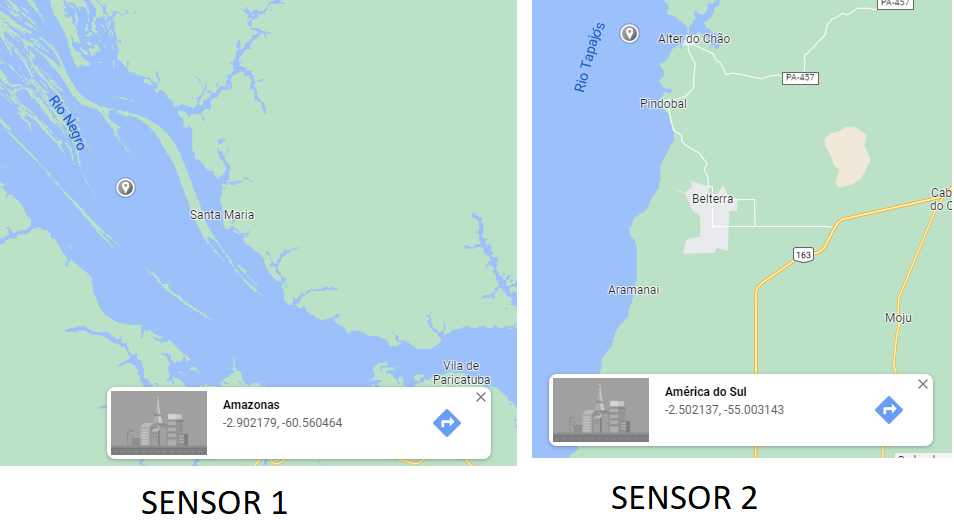

## DOWNLOAD E EXTRAÇÃO DOS PONTOS

In [1]:
import subprocess
import xarray as xr
import pandas as pd

In [2]:
def get_data(nome):
  link="https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/"+nome+"090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"
  subprocess.run(["wget",'-c','-O'+nome,'--user=antonio1234567','--password=Nostadramus1#',link]) 
  temp = xr.open_dataset("/content/"+nome)
  sensor1 = temp.sel(lat=-2.90,lon=-60.56).analysed_sst.data[0]
  sensor2 = temp.sel(lat=-2.50,lon=-55.00).analysed_sst.data[0]
  return [[-2.90,-60.56,sensor1],[-2.50,-55.00,sensor2]]

In [ ]:
ano_i = 2010
for mes in range(1,13):
  data = list()
  for dia in range(1,32):
    if dia < 10:
      dia_ = '0'+str(dia)
    else:
      dia_ = str(dia)
    if mes < 10:
      mes_ = '0'+str(mes)
    else:
      mes_ = str(mes)
    nome = str(ano_i)+str(mes_)+str(dia_)
    try:
      dados = get_data(nome)
      data.append(dados[0])
      data.append(dados[1])
      subprocess.run(['rm','/content/'+nome])
    except:
      print("Erro do dia: {}".format(dia))
  data = pd.DataFrame(data,columns=['Lat','Lon','Temp'])  
  nome = str(ano_i)+str(mes)+".csv"
  data.to_csv(nome)

## JUNÇÃO DOS DATASET
1. Optei por baixar os DS anuais manualmente, pois a minha conexão com a internet e ruim e ficar baixando de uma só vez poderia causar problemas, mas o código pode ser facilmente mudado para um download direto de todos os DS

In [ ]:
!unzip data.zip

2. Os anos de coleta foram de 2003 até 2010, com todos os meses sendo contemplados

In [17]:
df_final = pd.DataFrame(data=None,columns=['Lat','Lon','Temp'])
for ano in [2003,2004,2005,2006,2007,2008,2009,2010]:
  for mes in range(1,13):
    arq = "/content/data/"+str(ano)+str(mes)+".csv"
    df = pd.read_csv(arq,usecols=['Lat','Lon','Temp'])
    df_final = pd.concat([df_final,df])
df_final = df_final.reset_index()
df_final.to_csv("sensor_data.csv")

## RESULTADO FINAL:
1. O resultado final de todo o processamento deve ser um dataset que simule a saída de sensores reais. 
2. Esse dataset vai ser lido e enviado através de conexão python para o kfka, simulando uma operação de mqtt.